In [1]:
import cython

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

# This program is to learn about Natural Language processing and how SKlearn can help do that
# This particular program deals with seperateing spam messages with regular messages

In [10]:
# Start by opening words from a file
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [11]:
# tab seperated file
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
# Dataframe with two columns, one with the label(ham/spam) and one with actual message
# Ham is a regula message

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

print(messages.head())
print('\n')
print(messages.describe())
print('\n')
print(messages.groupby('label').describe())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


      message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4


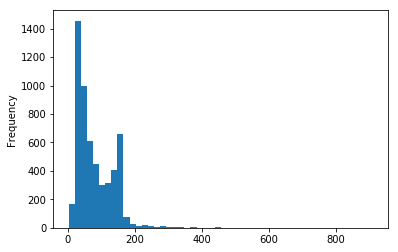

In [20]:
# Feature engineering
# Add another column called length of message to do do visualization of the data

messages['len_message'] = messages['message'].apply(len)

messages['len_message'].plot.hist(bins=50)

In [21]:
# Statistics for Length of Message Column
messages['len_message'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len_message, dtype: float64

In [22]:
# Longest Message
messages[messages['len_message']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013EC09F0780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000013EC0EB97B8>], dtype=object)

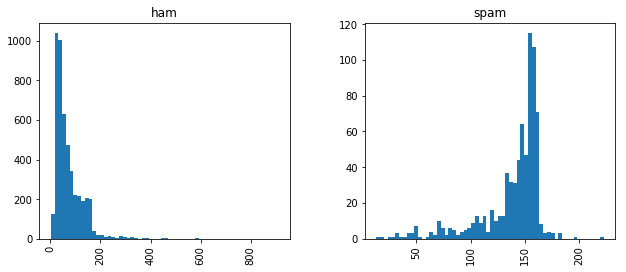

In [23]:
# Length of messages average for Spam is about 150, Ham is about 50
messages.hist(column='len_message', by='label', bins=60, figsize=(10,4))

In [25]:
# CountVectorizer converts a list of text messages into a sparse matrix

from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# Initialize CountVectorizer Object
vec = CountVectorizer()

# Create a List from the messages column of the messages dataframe
lst_messages = [x for x in messages['message']]

# Create a Sparse matrix
messages_vectorizer = vec.fit_transform(lst_messages)
print(type(messages_vectorizer))

<class 'scipy.sparse.csr.csr_matrix'>


In [40]:
# String has attribute for punctuation
import string

# nltk.corpus has 'stopwords' which is a variety of words that dont matter for our spam/ham message detector
from nltk.corpus import stopwords

In [56]:
# Example Message
mess = 'Sample Message! Notice: it has punctuation.'
no_punc=[c for c in mess if c not in string.punctuation]
no_punc = ''.join(no_punc)
# no_punc.split()
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
clean_mess = ' '.join(clean_mess)
print('Original Message')
print('1.',mess)
print()
print('Message without Puncuation')
print('2.',no_punc)
print()
print('Cleaned /message without stopwords')
print('3.',clean_mess)

Original Message
1. Sample Message! Notice: it has punctuation.

Message without Puncuation
2. Sample Message Notice it has punctuation

Cleaned /message without stopwords
3. Sample Message Notice punctuation


In [57]:
# This function does the process shown above
def text_process(mess):
    '''
    1. remove punc
    2. remove stopords
    3. return clean words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [67]:
print('Original Head of the Column Messages:\n',messages['message'].head())
print()
print('New Head of the Column Messages:\n',messages['message'].head().apply(text_process))
print('\n\nNotice Row three has no "in or to"')

Original Head of the Column Messages:
 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

New Head of the Column Messages:
 0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object


Notice Row three has no "in or to"


In [70]:
# Sparse matrices save on memory in the computer
from sklearn.feature_extraction.text import CountVectorizer
# Use analyzer parameter to clean all the messages
# bow_transformer is a CountVectorizer Object that has the clean messages 
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [76]:
print(bow_transformer)

CountVectorizer(analyzer=<function text_process at 0x0000013EC12C47B8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)


In [78]:
# 11425 features of the sparse matrix
len(bow_transformer.get_feature_names())

11425

In [86]:
print(type(bow_transformer))

<class 'sklearn.feature_extraction.text.CountVectorizer'>


In [81]:
# Transforming the matrix into an actual spare matrix we can use for spam detection

messages_bow = bow_transformer.transform(messages['message'])

In [85]:
# message_bow is a bag of words spare matrix from all the words in messages['message']
print('Shape of the sparse matrix: ', messages_bow.shape)

Shape of the sparse matrix:  (5572, 11425)


In [91]:
# Sparsity = numer/denom, messages_bow.nnz are the non-zero elements of the sparse matrix
denom = messages_bow.shape[0] * messages_bow.shape[1]
numer = 100 * messages_bow.nnz

# message_bow is a bag of words spare matrix from all the words in messages['message']
print('Shape of the sparse matrix: ', messages_bow.shape)
print('sparsity' , numer/denom)
print(type(messages_bow))


Shape of the sparse matrix:  (5572, 11425)
sparsity 0.07940295412668218
<class 'scipy.sparse.csr.csr_matrix'>


In [92]:
# TF-IDF
# short for term frequency–inverse document frequency, is a 
# numerical statistic that is intended to reflect how important 
# a word is to a document in a collection or corpus.
from sklearn.feature_extraction.text import TfidfTransformer

In [93]:
# Use the TFIDF Transformer to fit and transform the bag of words
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [94]:
print(messages_tfidf.shape)

(5572, 11425)


In [95]:
# Use MutlinomialNB for analysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
# split the data in X, y
# X: messages
# y: spam/ham
# Our Pipline will:
# 1. Make CountVectorizer Object
# 2. Transform the data into a sparse matrix
# 3. Classify the data using Multinomial Naive Bayes
X = messages['message']
y = messages['label']

msg_train, msg_test, label_train, label_test = train_test_split(X, y, test_size=0.25)

pipeline = Pipeline([
    ('count_vec', CountVectorizer(analyzer=text_process)),
    ('tdidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])

In [101]:
pipeline.fit(msg_train, label_train)
preds = pipeline.predict(msg_test)

Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer=<function text_process at 0x0000013EC12C47B8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...linear_tf=False, use_idf=True)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [104]:
print(classification_report(label_test, preds))
print(confusion_matrix(label_test, preds))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1216
       spam       1.00      0.68      0.81       177

avg / total       0.96      0.96      0.96      1393

[[1216    0]
 [  56  121]]


In [105]:
# Trying Logistic regression classifier instead of naive bayes
# How can these things be sped up???
from sklearn.linear_model import LogisticRegression

X_log = messages['message']
y_log = messages['label']

msg_train_log, msg_test_log, label_train_log, label_test_log = train_test_split(X_log, y_log, test_size=0.25)

pipeline = Pipeline([
    ('count_vec', CountVectorizer(analyzer=text_process)),
    ('tdidf', TfidfTransformer()),
    ('lg', LogisticRegression())
])

pipeline.fit(msg_train_log, label_train_log)
preds_log = pipeline.predict(msg_test_log)

# Does about the same as Naive Bayes
print(classification_report(label_test_log, preds_log))
print(confusion_matrix(label_test_log, preds_log))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1221
       spam       1.00      0.68      0.81       172

avg / total       0.96      0.96      0.96      1393

[[1221    0]
 [  55  117]]
